__________________________________________________

                  Welcome to Dev Bank

               The Bank of Technical Era
__________________________________________________

DATE:- Wednesday, June 10 	   TIME:- 16:35:40
__________________________________________________

|         Last Visit Mon Jun  8 13:46:41 2020         |
__________________________________________________
User Id		:dev9585
Key		: ········
__________________________________________________

		Welcome dev9585
__________________________________________________

|             Press 1        Your Details         |

|             Press 2     Change Password         |

|             Press 3      Online Support         |

|             Press 4           E-banking         |

|          Any Number                Exit         |
__________________________________________________
Condition Chosen : 	1
__________________________________________________
__________________________________________________

               

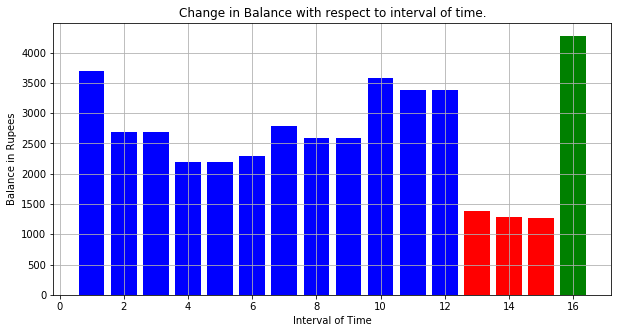

__________________________________________________
__________________________________________________


In [ ]:
from getpass import getpass
import numpy as np
import pandas as pd
import datetime,time
import mysql.connector as sqltor
import math, random
import os.path
%matplotlib inline
import matplotlib.pyplot as plt

def design(x,y):
        r=''
        if y is 2:
            hyphen='_'
        else:
            hyphen='*'
        for a in range(0,x):
            r+=hyphen
        print(r)
def datarep(x,y):
    print("\n|{0:>20}{1:>20}{2:>10}\n".format(x,y,'|'),end='')
def center(x):
    print("\n{0:<15}".format(''),end='')
    print("{0:>22}".format(x))

if os.path.exists('licensing.csv'):
    start=True
else:
    start=False

auth=''
acnum=''
m=0
mycon=sqltor.connect(host="localhost",user="root",passwd="mansion",database="test")
files=mycon.cursor()
files.execute('create database if not exists devbank')
files.execute('use devbank')

sql='''create table if not exists staff(
            id char(12) primary key,
            name char(20) not null ,
            pasw char(20) not null,
            post char(20) not null
        )'''

files.execute(sql)

if start is True:
    df=pd.read_csv('licensing.csv')
    if df.at[0,'Welcome'] == 'Dev':
        df.at[0,'Welcome']= '3.6.0'
        df.to_csv('licensing.csv')
        design(50,2)
        center('Your License has Verified')
        design(50,2)
        design(50,2)
        center('Important Points')
        design(50,2)
        datarep('Types of A/C','Saving & Current')
        center('For Saving')
        datarep('Min. Bal','2000')
        datarep('Service Chg.','0.5%')
        datarep('Min. Bal. Def. Chg.','5%')
        datarep('A/C will Suspended','Bal<100')
        design(50,2)
        center('For Current')
        datarep('Min. Bal','10000')
        datarep('Service Chg.','0%')
        datarep('Min. Bal. Def. Chg.','5%')
        datarep('A/C will Suspended','Bal<100')
        design(50,2)
        design(50,2)
        datarep('Version','3.6.0')
        center('Made under Supervision of Mr. Shah')
        design(50,2)
        center('The Above Message only Shows Once')
        design(50,2)

        files.execute("insert into staff values('arman@dev','Arman Singh','arman123','manager')")
        mycon.commit()
        files.execute("insert into staff values('aman@dev','Aman Kaur','aman123','teller')")
        mycon.commit()
        files.execute("insert into staff values('rahul@dev','Rahul Kumar','rahul123','cashier')")
        mycon.commit()

    
    
    
    
    
sql='''create table if not exists devcus(
            cusid char(12) primary key,
            acnum integer,
            ac_type char(10),
            name char(20),
            passw char(20) default 'iamdev',
            age int(3),
            gender char(1),
            phone bigint(20),
            crdate timestamp default current_timestamp ,
            active tinyint(1) default 1,
            balance integer
        )'''
files.execute(sql)

sql='''create table if not exists acstatement(
            cusid char(12),
            via varchar(50),
            chqnum varchar(20),
            amount varchar(20),
            date timestamp default current_timestamp,
            operation char(10),
            balance varchar(20)
            
        )'''
files.execute(sql)

sql='''create table if not exists atm(
            cusid char(12),
            atmnumber varchar(20),
            date timestamp default current_timestamp,
            pin char(4),
            status char(12) default 'Active'
            
        )'''
files.execute(sql)

sql='''create table if not exists application(
            cusid char(12),
            application varchar(20),
            date timestamp default current_timestamp,
            status char(12) default 'Unaccepted'
            
        )'''
files.execute(sql)

sql='''create table if not exists blocktrans(
            cusid char(12),
            cheqnum char(12),
            date timestamp default current_timestamp
            
        )'''
files.execute(sql)


while True:
    def vals(x):
        if x !='' and x!=' ':
            if x.isalpha() is True :
                return True
            else:
                design(50,1)
                center("Enter Data is Not valid")
                design(50,1)
        else:
            design(50,1)
            center("Null Value unacceptable")
            design(50,1)
    def valn(x):
        if x.isdigit() == True :
            return True
        else:
            design(50,2)
            center('Given Number is not valid')
            design(50,2)
            
    def nonzero(x):
        if x[0] != '0':
            return True
        else:
            design(50,2)
            center('Zero at First place Unacceptable')
            design(50,2)
            
        
            
    def valcon(x,y):
        if len(x) == y:
            return True        
        else:
            design(50,2)
            center('Given Number Not in Range')
            
    def alpha(n):
        num=["","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]
        tens=["Ten","Eleven","Tweleve","Thirteen","Fourteen","Fifteen","Sixteen","Seventeen","Eighteen","Nineteen"]
        nty=["","","Twenty","Thirty","Fourty","Fifty","Sixty","Seventy","Eighty","Ninety"]
        wrd=""
        r=1
        if n[0]!="0":
            if len(n)==7:
                if n[0]=="1":
                    wrd+=tens[int(n[1])]+ " Lakhs "
                    n=n[2::]
                    while int(n[0])==0 and r<5:
                        n=n[1::]
                        r=r+1
                else:
                    wrd+=nty[int(n[0])]+ " "+num[int(n[1])] + " Lakhs "
                    n=n[2::]
                    while int(n[0])==0 and r<5:
                        n=n[1::]
                        r=r+1
            if len(n)==6:
                wrd+=num[int(n[0])]+ " Lakhs "
                n=n[1::]
                while int(n[0])==0 and r<5:
                    n=n[1::]
                    r=r+1
            if len(n)==5:
                if n[0]=="1":
                    wrd+=tens[int(n[1])]+ " Thousand "
                    n=n[2::]
                else:
                    wrd+=nty[int(n[0])]+ " "+num[int(n[1])] + " Thousand "
                    n=n[2::]
            if len(n)==4:
                wrd+=num[int(n[0])]+" Thousand "
                n=n[1::]
            if len(n)==3:
                if n[0]!="0":
                    wrd+=num[int(n[0])]+" Hundred "
                    n=n[1::]
                else:
                    n=n[1::]
            if len(n)<=2:
                if len(n)==1:
                    wrd+=num[int(n)]
                elif int(n)<20:
                    if n[0]=="0":
                        wrd+=num[int(n[1])]
                    else:
                        wrd+=tens[int(n[1])]
                else:
                    wrd+=str(nty[int(n[0])])+" "+str(num[int(n[1])])
            else:
                print("Only upto 9999999")
        else:
            print("Zero at First place is not Acceptable")
        
        return wrd
                
    def usdetails(x,y):
        if x=='staff':
            if y!='a':
                files.execute("select cusid,acnum,ac_type,name,age,phone,active,balance from devcus where cusid = '{}' ".format(y))
                dt=files.fetchall()
                df=pd.DataFrame(dt,columns=["Cust ID","A/C_Num","A/C Type","Name","Age","Phone","Status","Balance"])
                df.set_index('Cust ID',inplace=True)
                return df
            elif y=='a':
                files.execute("select cusid,acnum,ac_type,name,age,phone,active,balance from devcus")
                dt=files.fetchall()
                df=pd.DataFrame(dt,columns=["Cust ID","A/C_Num","A/C Type","Name","Age","Phone","Status","Balance"])
                df.set_index('Cust ID',inplace=True)
                return df
        elif x=='cus':
            files.execute("select cusid,acnum,ac_type,name,age,gender,phone,crdate,balance from devcus where cusid = '{}' ".format(y))
            dt=files.fetchall()
            df=pd.DataFrame(dt,columns=["Cust ID","A/C_Num","A/C Type","Name","Age","M/F","Phone","Join Dt.","Balance"])
            df.set_index('Cust ID',inplace=True)
            return df
        else:
            files.execute("select * from devcus where cusid = '{}' ".format(y))
            dt=files.fetchall()
            df=pd.DataFrame(dt,columns=["Cust ID","A/C_Num","A/C Type","Name","key","Age","M/F","Phone","Join Dt.","Status","Balance"])
            df.set_index('Cust ID',inplace=True)
            return df
        
    def hasatm():
        files.execute("select cusid,atmnumber,date,status from atm ")
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["Cust ID","ATM Card No.","Applied Date","Status"])
        df.set_index('Cust ID',inplace=True)
        return df
    
    def applatm(x):
        df=hasatm()
        if x in df.index:
            design(50,2)
            center('You already have ATM Card')
            design(50,2)
        else:
            design(50,2)
            center('Pin should be = 4 digit')
            cn=getpass('Enter Pin for Your ATM Card : ')
            if valn(cn) is True and valcon(cn,4):
                cn=int(cn)
                design(50,2)
                acnum=''
                digits = "989006500058525800"
                for i in range(10):
                    acnum+=digits[math.floor(random.random() * 10)]
                acnum='560000'+acnum
                files.execute("insert into atm(cusid,atmnumber,pin,status) values(%s,%s,%s,%s)"\
                                  ,(x,acnum,cn,'Unactive'))
                mycon.commit()
                files.execute("insert into application(cusid,application) values(%s,%s)"\
                                  ,(x,'ATM '+acnum))
                mycon.commit()
                design(50,2)
                center('Application Submitted Successfully')
                datarep('ATM No.',acnum)
                center('For ATM Card visit Bank')
                design(50,2)
    
    def atmdetails():
        files.execute("select * from atm")
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["Cust ID","ATM Number","Date","Pin","Status"])
        df.set_index('Cust ID',inplace=True)
        return df
        
        
    
    def status(x,y):
        if y=='Account':
            df=usdetails('staff',x)
            if df.at[x,'Status'] == 1:
                return True
            else:
                return False
        elif y=='ATM':
            df=hasatm()
            if df.at[x,'Status'] == 'Unactive':
                return False
            else:
                return True
        else:
            df=appldetails()
            if df.at[x,'Status'] == 'Unaccepted':
                return False
            else:
                return True
            
            
    def appldetails():
        files.execute("select * from application")
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["Cust ID","Application","Date","Status"])
        df.set_index('Cust ID',inplace=True)
        return df
        
        
            
    def updstatus(x,y,z):
        if y=='Account':
            files.execute("update devcus set active='{}' where cusid='{}'".format(z,x))
            mycon.commit()
            design(50,2)
            center("Changes made Successfully")
            design(50,2)
            design(50,2)
            datarep('Current Status',z)
            design(50,2)
            
        elif y=='ATM':
            files.execute("update atm set status='{}' where cusid='{}'".format(z,x))
            mycon.commit()
            design(50,2)
            center("Changes made Successfully")
            design(50,2)
            design(50,2)
            datarep('Current Status',z)
            design(50,2)
            

        else:
            if status(x,'Appl') is False:
                files.execute("update application set status='{}' where cusid='{}'".format(z,x))
                mycon.commit()
                design(50,2)
                center("Apllication Accepted Successfully")
                design(50,2)
            else:
                design(50,2)
                center("Apllication Already Accepted")
                center("No Changes Detected")
                design(50,2)
                

    def acstatement(x):
        files.execute("select via,chqnum,amount,operation,date,balance from acstatement where cusid = '{}' ".format(x))
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["VIA","ChqNum.","Amount","Operation","Transaction Date","Balance"])
        df.set_index('Transaction Date',inplace=True)
        return df
    
    def graph(x):
        df=acstatement(x)
        l1=[]
        l2=[]
        clr=[]
        xa=df.index
        xa=xa.values
        y=df['Balance']
        y=y.values
        for a in range(len(xa)):
            l1.append(a+1)
            l2.append(float(y[a]))
            if acty(x,0) == 'saving':
                if l2[a] < 2000 :
                    clr.append('r')
                elif l2[a] == 2000 or l2[a] < 4000:
                    clr.append('b')
                else:
                    clr.append('g')
            else:
                if l2[a] < 10000 :
                    clr.append('r')
                elif l2[a] == 10000 or l2[a] < 20000:
                    clr.append('b')
                else:
                    clr.append('g')
        plt.figure(figsize=(10,5))
        plt.grid(True)
        plt.title('Change in Balance with respect to interval of time.')
        plt.xlabel('Interval of Time')
        plt.ylabel('Balance in Rupees')
        plt.bar(l1,l2,color=clr)
        plt.show()
        
    def amountstatus(x,a,c,b):
        while True:
            if c == 'aa' or c=='ac':
                if c =='aa':
                    files.execute("select via,chqnum,amount,date from acstatement where amount={} and cusid = '{}' and operation = 'Add' ".format(a,x))
                    dt=files.fetchall()
                    break
                else:
                    files.execute("select via,chqnum,amount,date from acstatement where chqnum={} and cusid = '{}' and operation = 'Add'".format(a,x))
                    dt=files.fetchall()
                    break

            else:
                if c == 'wa':
                    files.execute("select via,chqnum,amount,date from acstatement where amount={} and cusid = '{}' and operation = 'Less' ".format(a,x))
                    dt=files.fetchall()
                    break
                else:
                    files.execute("select via,chqnum,amount,date from acstatement where chqnum={} and cusid = '{}' and operation = 'Less' ".format(a,x))
                    dt=files.fetchall()
                    break
                    
        if dt == []:
            design(50,2)
            center('No Such Transaction Found')
            design(50,2)
        else:
            df=pd.DataFrame(dt,columns=["Reference Via","Cheq No.","Amount","Transaction Date"])
            df.set_index('Reference Via',inplace=True)
            return print(df)
    
    def cheqnum(x,c):
        files.execute("select chqnum,via from acstatement where cusid = '{}' and via like '-%' ".format(x))
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["Cheq No.","Via"])
        df.set_index('Cheq No.',inplace=True)
        if c in df.index :
            design(50,2)
            center('Cheque already in System')
            center('Changes Unmade Yet')
            design(50,2)
            
        else:
            return True
        
        
    def blcdup(x,c):
        files.execute("select cheqnum,date from blocktrans where cusid = '{}'".format(x))
        dt=files.fetchall()
        df=pd.DataFrame(dt,columns=["Cheq No.","Date"])
        df.set_index('Cheq No.',inplace=True)
        if c in df.index :
            design(50,2)
            center('Cheque already Blocked')
            center('Changes Unmade Yet')
            design(50,2)
            
        else:
            return True
        
    def chcid(x):
        op=x[::-1]
        p=1
        if op[0]=='v':
            df1=staffdetails()
            if x in df1.index:
                return True,'staff'
            else:
                design(50,1)
                center('Unauthenticated Id has given')
                return False,'staff'
                design(50,1)
        elif x[0]=='d':
            df1=usdetails('staff','a')
            if x in df1.index:
                return True,'cus'
            else:
                design(50,1)
                center('Unauthenticated Id has given')
                return False,'cus'
                design(50,1)
        else:
            design(50,1)
            center('Unauthenticated Id has given')
            return False,'cus'
            design(50,1)
            
    def staffdetails():
        files.execute('select * from staff')
        d=files.fetchall()
        df1=pd.DataFrame(d,columns=['id','name','key','post'])
        df1.set_index('id',inplace=True)
        return df1
    
    def login(x,y,z):
        if y == 'staff':
            df=staffdetails()
            if df.at[x,'key'] == z:     
                return True
            else:
                design(50,2)
                print('\tPassword is Wrong as per id',x)
                design(50,2)
        else:
            df=usdetails('login',x)
            if df.at[x,'key'] == z:
                if z == 'iamdev':
                    design(50,2)
                    center('Its your Default Password')
                    center('Change Password and Proceed')
                    design(50,2)
                    changepsw('iamdev',x,0)
                    
                else:
                    return True
            else:
                design(50,2)
                print('\tPassword is Wrong as per id',x)
                design(50,2)
                
            
    def chcauth(x,y):
        df1=staffdetails()
        if y=='addcus' or y=='updcus':
            if df1.at[x,'post'] == 'manager' or df1.at[x,'post'] == 'teller':
                return True
            else:
                print('Your are not Authorised for this fuction.')
        elif y=='updcash':
            if df1.at[x,'post'] == 'manager' or df1.at[x,'post'] == 'cashier':
                return True
            else:
                print('Your are not Authorised for updating Cash Balances.')
                
    def acty(x,y):
        if y is 0:
            df=usdetails('staff',x)
            return df.at[x,'A/C Type']
        else:
            df=usdetails('staff',x)
            ty=df.at[x,'A/C Type']
            if ty=='saving':
                files.execute("update devcus set ac_type='{}' where cusid='{}'".format('current',x))
                mycon.commit()
            else:
                files.execute("update devcus set ac_type='{}' where cusid='{}'".format('saving',x))
                mycon.commit()

    def phnchg(x):
        df=usdetails('staff',x)
        p=df.at[c,'Phone']
        design(50,2)
        datarep('At Present',p)
        design(50,2)
        d=input('Want to Change Number of Customer y/n : ')
        if d=='y' or d=='Y':
            phn=input('New Phone Number \t : ')
            response=valn(phn)
            response2=valcon(phn,10)
            if response is True and response2 is True and nonzero(phn) is True:
                phn=int(phn)
                files.execute("update devcus set phone='{}' where cusid='{}'".format(phn,x))
                mycon.commit()
                return True
        else:
            design(50,2)
            center('Changes Unmade Yet')
            design(50,2)

            
    def cusbal(x):
        df=usdetails('staff',x) 
        return df.at[x,'Balance']
    
    def blchq(x,c):
        if c == 'b':
            design(50,2)
            center('Remember once a ')
            center('Transaction is blocked')
            center('It will never recovered')
            design(50,2)
            d=input('Want to Continue y/n : ')
            if d == 'y' or d=='Y':
                design(50,2)
                d=input('Enter Cheque Number : ')
                if valn(d) is True and nonzero(d) is True:
                    if cheqnum(x,d) is True:
                        if blcdup(x,d) is True:
                            files.execute("insert into blocktrans(cusid,cheqnum) values(%s,%s)",(x,d))
                            mycon.commit()
                            design(50,2)
                            center('Changes made Successfully')
                            design(50,2)

                else:
                    design(50,2)
                    center('Changes Unmade Yet')
                    design(50,2)
        else:
            files.execute("select * from blocktrans where cusid='{}'".format(x))
            d=files.fetchall()
            df1=pd.DataFrame(d,columns=['id','Cheq No.','Entered Date'])
            df1.set_index('Cheq No.',inplace=True)
            return df1
            

    
    def pswpwr(x):
        if len(x)>=6:
            if x.isalpha()==True:
                design(50,2)
                center("Password Status : Too Weak")
                design(50,2)
            elif x=="" or x==" ":
                design(50,2)
                center("Password Status : Null")
                design(50,2)
            else:
                return True
        else:
            design(50,2)
            center("Password must >= 6 digit ")
            design(50,2)
    
            
            
                
    def changepsw(x,y,z):
        ph=input('\tWant to change Password/PIN ? y/n : ')
        if vals(ph) is True:
            if ph is 'Y' or ph is 'y':
                design(50,2)
                ph=getpass('Current Password/PIN : \t ')
                design(50,2)
                if ph == x:
                    if z==1 or z==0:
                        design(50,2)
                        print('Password must have 6 digits including at least ')
                        datarep('1','Number')
                        datarep('1','capital char')
                        design(50,2)
                        design(50,2)
                        ph=getpass('New Password : \t ')
                        design(50,2)
                        if pswpwr(ph) is True:
                            if z == 1:  #if Z==1 it means Staff Password Conversion else of Customer
                                files.execute("update staff set pasw ='{}' where id='{}'".format(ph,y))
                                mycon.commit()
                                design(50,2)
                                center('Password Change Successfully')
                                design(50,2)
                            elif z == 0:
                                files.execute("update devcus set passw ='{}' where cusid='{}'".format(ph,y))
                                mycon.commit()
                                design(50,2)
                                center('Password Change Successfully')
                                design(50,2)
                    else:
                        design(50,2)
                        center('PIN must have 4 digits')
                        design(50,2)
                        ph=getpass('New PIN : \t ')
                        design(50,2)
                        if valn(ph) is True and valcon(ph,4):
                            files.execute("update atm set pin ='{}' where cusid='{}'".format(ph,y))
                            mycon.commit()
                            design(50,2)
                            center('Pin Change Successfully')
                            design(50,2)

                else:
                    design(50,2)
                    center('Pssword/PIN is unmatched')
                    design(50,2)

            else:
                design(50,2)
                center('No Changes Detected')
                design(50,2)

                
        

                            
    def chcbal(x,y):
        if y == 'saving':
            if x>=2000:
                return True
            else:
                print('Minimum Saving A/C Bal. > 2000 Terminated ')
        elif y =='current':
            if x>=10000:
                return True
            else:
                print('Minimum Current A/C Bal. > 10000 Terminated ')
                
    def amtmang(i,b,v,a,p,c):
        files.execute("update devcus set balance ='{}' where cusid='{}'".format(b,i))
        mycon.commit()
        files.execute("insert into acstatement(cusid,via,chqnum,amount,operation,balance) values(%s,%s,%s,%s,%s,%s)"\
                                  ,(i,v,c,a,p,str(b)))
        mycon.commit()
        if v != 'Def.Chg. 5%' and v!='Service Chg. 0.5%':
            if '+By' not in v :
                chcdef(i,b,a)
                design(50,2)
                center('Balance Upadated Successfully')
                datarep('Now Balance',cusbal(i))
                design(50,2)

        

                
    def addmoney(x):
        p=cusbal(x)
        design(50,2)
        datarep('Present Balance',p)
        design(50,2)
        c=input('Want to add Money ? y/n : ')
        if c == 'Y' or c=='y':
            a=input('Amount to be Added \t : ')
            response=valn(a)
            if response is True and nonzero(a) is True:
                design(50,2)
                datarep('Amount in Words ',alpha(a))
                design(50,2)
                a=int(a)
                if a >=100:
                    center('Deposit in Refrence')
                    design(50,2)
                    datarep('Press 1','Cash')
                    datarep('Press 2','Cheque')
                    datarep('Press 3','Others')
                    datarep('Any Num','Back')
                    design(50,2)
                    cn=input('condition Chosen \t : ')
                    design(50,2)
                    if valn(cn) is True:
                        cn=int(cn)
                        if cn > 3 or cn <= 0:
                            center('Back to Main Menu')
                        else:
                            if cn is 1:
                                t='Cash Deposit'
                                b=p+a
                                amtmang(x,b,t,str(a),'Add','0')
                            elif cn is 2:
                                design(50,2)
                                c=input('Cheque No. \t : ')
                                y=input('Bank Name. in short form e.g. SBI \t : ')
                                design(50,2)
                                if valn(c) is True and nonzero(c) is True:
                                    if vals(y) is True:
                                        t=y+' Cheq No.' + c
                                        b=p+a
                                        amtmang(x,b,t,str(a),'Add',c)
                            elif cn is 3:
                                design(50,2)
                                c=input("Ref. \t: ")
                                if valn(c) is False:
                                    design(50,2)
                                    b=p+a
                                    amtmang(x,b,c,str(a),'Add','0')
                            else:
                                print('\tBack to Main Menu')
                                
                else:
                    design(50,2)
                    center('Minimum Deposit 200  ')
                    design(50,2)

                    
        else:
            design(50,2)
            print('\tBack to main menu')
            design(50,2)
#        This is For Charging Interest >> below:     
    def cg(x,a):
        p=cusbal(x)
        cg=a//100*0.5
        design(50,2)
        datarep('Service Chg.(0.5%) Deducted',cg)
        design(50,2)
        p=p-cg
        amtmang(x,p,'Service Chg. 0.5%',str(cg),'Less','0')
        
    def defchg(x,a):
        p=cusbal(x)
        cg=a//100*5
        design(50,2)
        print('\n\tMinimum Bal. Defaulting Charges',cg)
        design(50,2)
        p=p-cg
        amtmang(x,p,'Def.Chg. 5%',str(cg),'Less','0')
        
    def chcdef(x,b,a):
        a=int(a)
        t=acty(x,0)
        if t =='saving' and b<2000:
            design(50,2)
            center('As A/C Balance < Minimum Balance')
            center('Rate of Int. will charge')
            datarep('For Saving','5%')
            design(50,2)
            defchg(x,a)
        elif t =='current' and b<10000:
            design(50,2)
            center('As A/C Balance < Minimum Balance')
            center('Rate of Int. will charge')
            datarep('For Current','5%')
            design(50,2)
            defchg(x,a)
            
    def suspension(x):
        ty=acty(x,0)
        if ty == 'saving':
            if cusbal(x) < 100 :
                return True
            else:
                return False

        else:
            if cusbal(x) < 1000:
                return True
            else:
                return False
            
            

    def lessmoney(x):
        p=cusbal(x)
        ty=acty(x,0)
        design(50,2)
        datarep('Present Balance',p)
        datarep('A/C Type of Cus',ty)
        design(50,2)
        c=input('Want to Deduct Amount ? y/n : ')
        if c == 'Y' or c=='y':
            a=input('Amount to be Deducted \t : ')
            response=valn(a)
            if response is True and nonzero(a) is True:
                design(50,2)
                datarep('Amount in Words ',alpha(a))
                design(50,2)
                a=int(a)
                if a >=100:
                    if a < p:
                        center('Deducted in Refrence')
                        design(50,2)
                        datarep('Press 1','Withdrwn Cash')
                        datarep('Press 2','Self_Cheq/DD')
                        datarep('Press 3','NEFT/RTGS')
                        datarep('Press 4','Others')
                        datarep('Any Num','Back')
                        design(50,2)
                        cn=input('condition Chosen \t : ')
                        design(50,2)
                        if valn(cn) is True:
                            cn=int(cn)
                            if cn > 4 or cn <= 0:
                                center('Back to Main Menu')
                            else:
                                if cn is 1:
                                    t='Cash Wihdrawn'
                                    b=p-a
                                    amtmang(x,b,t,str(a),'Less','0')
                                        
                                else:
                                    if cn is 2:
                                        design(50,2)
                                        c=input('Cheque No. \t : ')
                                        design(50,2)
                                        if valn(c) is True and nonzero(c) is True:
                                            if cheqnum(x,c) is True:
                                                df=blchq(x,'h')
                                                if c in df.index:
                                                    design(50,2)
                                                    center('This Cheque is Termminated')
                                                    center('As per Account Holder')
                                                    center('Changes Unmade')
                                                    design(50,2)
                                                else:
                                                    if ty=='saving':
                                                        t='Cheq. '+ c
                                                        b=p-a
                                                        amtmang(x,b,t,str(a),'Less',c)
                                                        cg(x,a)
                                                    else:
                                                        t='Cheq. '+ c
                                                        b=p-a
                                                        amtmang(x,b,t,str(a),'Less',c)
                                    elif cn is 3:
                                        design(50,2)
                                        c=input('Cheque No. \t : ')
                                        design(50,2)
                                        if valn(c) is True and nonzero(c) is True:
                                            if cheqnum(x,c) is True:
                                                c2=input('Ref to. \t : ')
                                                if int(c) > 0 and valn(c2) is False and c2 !='' or c2 !=' ':
                                                    if ty=='saving':
                                                        t='NEFT/RTGS ' + c2
                                                        b=p-a
                                                        amtmang(x,b,t,str(a),'Less',c)
                                                        cg(x,a)
                                                    else:
                                                        t='NEFT/RTGS ' + c2
                                                        b=p-a
                                                        amtmang(x,b,t,str(a),'Less',c)
                                                else:
                                                    design(50,2)
                                                    center('Invalid Data has Given')
                                                    design(50,2)

                                    else:
                                        design(50,2)
                                        c=input('Ref to \t : ')
                                        design(50,2)
                                        if valn(c) is False:
                                            if ty=='saving':
                                                b=p-a
                                                amtmang(x,b,c,str(a),'Less','0')
                                                cg(x,a)
                                            else:
                                                b=p-a
                                                amtmang(x,b,c,str(a),'Less','0')
                                        
                    else:
                        design(50,2)
                        center('Maximum Drawing',p)
                        design(50,2)
                else:
                    design(50,2)
                    center('Minimum Drawing 200  ')
                    design(50,2)
        else:
            design(50,2)
            print('\tBack to main menu')
            design(50,2)
            
    def chcacnum(a):
        files.execute("select cusid,acnum,ac_type,name,balance from devcus where acnum = '{}'".format(a))
        dt=files.fetchall()
        if dt == []:
            return False
        else:
            df=pd.DataFrame(dt,columns=["Cusid","A/C Num","A/C Type","Name","Balance"])
            df.set_index('A/C Num',inplace=True)
            return df
            
            
    def transfund(x,y):
        p=cusbal(x)
        ty=acty(x,0)
        dfx=usdetails('staff',x)
        design(50,2)
        datarep('Your Present Balance',p)
        design(50,2)
        c=input('Want to Transfer Amount ? y/n : ')
        if c == 'Y' or c=='y':
            a=input('Amount to be Transfer \t : ')
            response=valn(a)
            if response is True and nonzero(a) is True:
                design(50,2)
                datarep('Amount in Words ',alpha(a))
                design(50,2)
                a=int(a)
                if a >=100:
                    if a < p:
                        design(50,2)
                        b=input('Enter Beneficiary Account Number : ')
                        design(50,2)
                        if valn(b) is True and nonzero(b) is True:
                            if y == 's':
                                if chcacnum(b) is not False:
                                    design(50,2)
                                    df=chcacnum(b)
                                    if df.at[int(b),'Cusid'] != x:
                                        datarep('Name',df.at[int(b),'Name'])
                                        datarep('A/C Type',df.at[int(b),'A/C Type'])
                                        design(50,2)
                                        c=input('Want to Benefit Amount ? y/n : ')
                                        if c == 'Y' or c=='y':
                                            c='-To '+ df.at[int(b),'Name'] + ' ' + b
                                            y=p-a
                                            t=datetime.datetime.now()
                                            receipt(int(b),df.at[int(b),'Name'],a,t.strftime("%H:%M:%S"),d.strftime("%A, %B %d"),'Dev Bank')
                                            amtmang(x,y,c,a,'Less','0')
                                            c='+By '+ dfx.at[x,'Name'] + ' ' + str(dfx.at[x,'A/C_Num']) 
                                            y=df.at[int(b),'Balance']
                                            y=y+a
                                            amtmang(df.at[int(b),'Cusid'],y,c,a,'Add','0')
                                            design(50,2)
                                            center('Balance Transfer Successfully')
                                            datarep(b+' Credited',a)
                                            design(50,2)
                                            if ty=='saving':
                                                cg(x,a)

                                        else:
                                            design(50,2)
                                            center('Transaction Terminated')
                                            design(50,2)
                                    else:
                                        design(50,2)
                                        center("You Can't Benefit Your Own A/C")
                                        design(50,2)

                                else:
                                    design(50,2)
                                    center('No Such Dev Account Found')
                                    design(50,2)
                    
                            else:
                                if len(b) >= 8 and len(b) < 12:
                                    df=chcacnum(b)
                                    if b!= dfx.at[x,'A/C_Num']:
                                        c=input('Want to Benefit Amount ? y/n : ')
                                        if c == 'Y' or c=='y':
                                            c='-To '+ b
                                            y=p-a
                                            t=datetime.datetime.now()
                                            receipt(int(b),'Unknown',a,t.strftime("%H:%M:%S"),d.strftime("%A, %B %d"),'UnKnown')
                                            amtmang(x,y,c,a,'Less','0')
                                            design(50,2)
                                            center('Balance Transfer Successfully')
                                            datarep(b+' Credited',a)
                                            design(50,2)
                                            if ty=='saving':
                                                cg(x,a)
                                else:
                                    design(50,2)
                                    center('Invalid A/C Number has given')
                                    design(50,2)
                                
                    else:
                        design(50,2)
                        center('Balance Defeciency Occurs')
                        design(50,2)
                        
                else:
                    design(50,2)
                    center('Minimum Fund tranfer > = 100')
                    design(50,2)
                                    
        else:
            design(50,2)
            center('Changes Unmade Yet')
            design(50,2)
    
    def save(x):
        design(50,2)
        a=input('Want to Save this Document y/n : ')
        design(50,2)
        if vals(a) is True:
            if a == 'y' or a=='Y':
                design(50,2)
                b=input('Enter the Name of the Document : \t ')
                design(50,2)
                b=b+'.csv'
                if os.path.exists(b):
                    design(50,2)
                    center('File Name Already Exists')
                    design(50,2)
                    design(50,2)
                    a=input('Want to Replace or Overwrite ? y/n : ')
                    design(50,2)
                    if vals(a) is True :
                        if a=='y' or a=='Y':
                            x.to_csv(b)
                            design(50,2)
                            center('Document Save Successfully')
                            datarep('Document Name',b)
                            design(50,2)
                        else:
                            design(50,2)
                            center('Try Again with Different Name')
                            design(50,2)
                            
                else:
                    b=b+'.csv'
                    x.to_csv(b)
                    design(50,2)
                    center('Document Save Successfully')
                    datarep('Document Name',b)
                    design(50,2)
            else:
                design(50,2)
                center('Proposal Rejected')
                design(50,2)
        
        
        
                                    
    def receipt(x,y,z,a,d,b):
        print('\n')
        design(50,2)
        center("Dev Bank")
        center("Kapurthala Road Jalandhar")
        design(50,2)
        center('Transfer Memo as per Tansac.')
        design(50,2)
        datarep('Benef. Bank',b)
        datarep('Benef. A/C',x)
        datarep('Banef. Name',y)
        datarep('Amount in Figure.',z)
        datarep('Amount in Words ',alpha(str(z)))
        datarep('Transc. Time',a)
        datarep('Transc. Date',d)
        design(50,2)
        center('Thanks for Opeartion')
        design(50,2)
        print('\n')
        
        
        
        
            
    def addcus():
        design(50,2)
        datarep('Press S','Svaing A/C')
        datarep('Press C','Current A/C')
        design(50,2)
        design(50,2)
        cond=input('A/C Type \t: ')
        design(50,2)
        print('Be Sure Any Error will make system all entered data erase')
        design(50,2)
        if cond == 'S' or cond=='s':
            s=1
            typ='saving'
        elif cond == 'C' or cond=='c':
            s=2
            typ='current'
        else:
            design(50,2)
            print('Wrong Condition has Chosen Try Again')
            design(50,2)
            s=3
            return s
        if s!=3:
            while True:
                nam=input('Enter Name of the person : ')
                response=vals(nam)
                if response is True:
                    age=int(input('Age of the Person must be >=5 and < 80 : '))
                    if age > 80 and age<=5:
                        center('Age > 80 is not allowed')
                    else:
                        gen=input("Gender M/F : ")
                        if gen == 'm' or gen=='M' or gen == 'F' or gen == 'f':
                            phn=input("Contact No. : ")
                            response1=valn(phn)
                            response2=valcon(phn,10)
                            if response1 is True and response2 is True and nonzero(phn) is True:
                                phn=int(phn)
                                print('For Svaing A/c bal >= 2000 and for Current A/c bal>=10000')
                                bal=input('Enter the initial Amount : ')
                                response=valn(bal)
                                if response is True and nonzero(bal) is True:
                                    design(50,2)
                                    datarep('Amount in Words ',alpha(a))
                                    design(50,2)
                                    bal=int(bal)
                                    response=chcbal(bal,typ)
                                    if response is True:
                                        acnum=''
                                        devid='dev'
                                        digits = "987456154542525874"
                                        for i in range(8):
                                            acnum+=digits[math.floor(random.random() * 10)]
                                        for i in range(4) :
                                            devid += digits[math.floor(random.random() * 10)]
                                        acnum=int(acnum)
                                        files.execute("insert into devcus(cusid,acnum,ac_type,name,age,gender,phone,balance) values(%s,%s,%s,%s,%s,%s,%s,%s)"\
                                                      ,(devid,acnum,typ,nam,age,gen,phn,bal))
                                        mycon.commit()
                                        files.execute("insert into acstatement(cusid,via,amount,balance) values(%s,%s,%s,%s)"\
                                                      ,(devid,'Initial Amount',str(bal),str(bal)))
                                        mycon.commit()
                                        acstatus=True
                                        return acstatus,devid
                                        break
                        else:
                            design(50,1)
                            center("Gender Either M/F or m/f")
                            design(50,1)

                            
                                    
                design(50,2)
    design(50,2)
    center('Welcome to Dev Bank'),center('The Bank of Technical Era')
    design(50,2)
    d=datetime.date.today()
    t=datetime.datetime.now()
    print("\nDATE:-",d.strftime("%A, %B %d"),"\t   TIME:-",t.strftime("%H:%M:%S"))
    design(50,2)
    a=os.path.getmtime('Dev Bank.ipynb')
    datarep('Last Visit ',time.ctime(a))
    design(50,2)
    while True:
        if start is True:
            x=input("User Id\t\t:")
            if x!='' and x!=' ':
                response=chcid(x)
                if response[0] is True:
                    pasw=getpass('Key\t\t: ')
                    response2=login(x,response[1],pasw)
                    if response2 is True:
                        if response[1]=='staff':
                            while True:
                                design(50,1)
                                print('\t\tWelcome',x)
                                design(50,1)
                                datarep('Press 1','Add New Customer')
                                datarep('Press 2','Change Your Password')
                                datarep('Press 3','View Cust. Details')
                                datarep('Press 4','Update Cust.Details')
                                datarep('Press 5','Update Balance')
                                datarep('Press 6','See Apllications')
                                datarep('Any Number','Exit')
                                design(50,2)
                                cn2=input("Condition Chosen : \t")
                                response=valn(cn2)
                                if response is True:
                                    cn2=int(cn2)
                                    design(50,2)
                                    if cn2 is 1:
                                        response=chcauth(x,'addcus')
                                        if response is True:
                                            response2=addcus()
                                            if response2 !=3:
                                                if response2[0] is True:
                                                    design(50,2)
                                                    center('Account Crtd. Successfully')
                                                    design(50,2)
                                                    response=usdetails('staff',response2[1])
                                                    print(response)

                                    elif cn2 is 2:
                                        df1=staffdetails()
                                        p=df1.at[x,'key']
                                        changepsw(p,x,1)
                                    elif cn2 is 3:
                                        design(50,1)
                                        datarep('Press a','For all')
                                        c=input('Enter Userid of the Customer : ')
                                        if c=='a':
                                            design(50,2)
                                            response=usdetails('staff',c)
                                            design(50,2)
                                            center('Accounts Details ')
                                            design(50,1)
                                            design(50,2)
                                            print(response)
                                            design(50,2)
                                        else:
                                            response=chcid(c)
                                            if response[0] is True and response[1] == 'cus':
                                                design(50,2)
                                                response=usdetails('staff',c)
                                                design(50,2)
                                                center('Accounts Details ')
                                                design(50,1)
                                                design(50,2)
                                                print(response)
                                                design(50,2)
                                            else:
                                                design(50,2)
                                                print('Wrong Customer ID has Given')
                                                design(50,2)


                                    elif cn2 is 4:
                                        response=chcauth(x,'updcus')
                                        if response is True:
                                            design(50,2)
                                            center('Things Can be Updated')
                                            design(50,2)
                                            datarep('Press 1','A/C Type')
                                            datarep('Press 2','Phone')
                                            datarep('Any Num','Back')
                                            design(50,2)
                                            cn=input('condition Chosen \t : ')
                                            if valn(cn) is True:
                                                cn=int(cn)
                                                if cn > 2 or cn <= 0:
                                                    center('Back to Mian Menu')
                                                else:
                                                    c=input('User ID of the Customer : ')
                                                    response=chcid(c)
                                                    if response[0] is True and response[1] == 'cus':
                                                        if cn is 1:
                                                            response=acty(c,0)
                                                            bal=cusbal(c)
                                                            if response == 'saving' and bal>=10000:
                                                                design(50,2)
                                                                datarep('At Present','Saving A/c')
                                                                design(50,2)
                                                                d=input('Convert Saving A/C to Current A/C - y/n : ')
                                                                if d =='Y' or d=='y':
                                                                    acty(c,1)
                                                                    design(50,1)
                                                                    center('Successfuly Converted to Current A/c')
                                                                    design(50,1)
                                                                else:
                                                                    design(50,1)
                                                                    center('Changes Unmade Yet')
                                                                    design(50,1)
                                                            elif response == 'current' and bal>=2000:
                                                                design(50,2)
                                                                datarep('At Present','Current A/c')
                                                                design(50,2)
                                                                d=input('Convert Current A/C to Saving A/C - y/n : ')
                                                                if d =='Y' or d=='y':
                                                                    acty(c,1)
                                                                    design(50,1)
                                                                    center('Successfuly Converted to Saving A/c')
                                                                    design(50,1)
                                                                else:
                                                                    design(50,1)
                                                                    center('Changes Yet Unmade ')
                                                                    design(50,1)
                                                            else:
                                                                design(50,1)
                                                                print('Balance is Not Sufficient for Conversion')
                                                                design(50,1)
                                                                design(50,2)
                                                                datarep('current','Bal>=10000')
                                                                datarep('Saving','Bal>=2000')
                                                                design(50,2)

                                                        elif cn is 2:
                                                            response=phnchg(c)
                                                            if response is True:
                                                                design(50,1)
                                                                print('Phone Number is Successfully Updated')
                                                                design(50,1)

                                                    else:
                                                        design(50,2)
                                                        print('Wrong Customer ID has Given')
                                                        design(50,2)
                                    elif cn2 is 5:
                                        response=chcauth(x,'updcash')
                                        if response is True:
                                            design(50,2)
                                            center('Things Can be Done')
                                            design(50,2)
                                            datarep('Press 1','Add Money')
                                            datarep('Press 2','Withdrw Money')
                                            datarep('Any Num','Back')
                                            design(50,2)
                                            cn=input('condition Chosen \t : ')
                                            if valn(cn) is True:
                                                cn=int(cn)
                                                if cn > 2 or cn <= 0:
                                                    center('Back to Mian Menu')
                                                else:
                                                    c=input('User ID of the Customer : ')
                                                    response=chcid(c)
                                                    if response[0] is True and response[1] == 'cus':
                                                        if cn is 1:
                                                            addmoney(c)
                                                        else:
                                                            lessmoney(c)
                                    elif cn2 is 6:
                                        response=chcauth(x,'updcus')
                                        if response is True:
                                            design(50,2)
                                            center('E-Applications below')
                                            design(50,2)
                                            df=appldetails()
                                            if df.empty:
                                                design(50,2)
                                                center('No Record Found')
                                                design(50,2)
                                            else:
                                                design(50,2)
                                                datarep('Press 1','Update Status')
                                                datarep('Any Key','Back')
                                                design(50,2)
                                                cn=input('condition Chosen \t : ')
                                                if valn(cn) is True:
                                                    cn=int(cn)
                                                    if cn > 2 or cn <= 0:
                                                        center('Back to Mian Menu')
                                                    else:
                                                        c=input('User ID of the Customer : ')
                                                        response=chcid(c)
                                                        if response[0] is True and response[1] == 'cus':
                                                            updstatus(c,'Appl','Accepted')
                                                            if status(c,'Appl') is False:
                                                                updstatus(c,'ATM','Active')
                                    else:
                                        design(50,2)
                                        center('Thanks for Visit ')
                                        datarep('User Id',x)
                                        t=datetime.datetime.now()
                                        datarep('Leave at',t.strftime("%H:%M:%S"))
                                        center(d.strftime("%A, %B %d"))
                                        center('!! Have a Good Day !!')
                                        design(50,2)
                                        break


                        else:
                            while True:
                                if suspension(x) is False:
                                    design(50,2)
                                    print('\n\t\tWelcome',x)
                                    design(50,2)
                                    datarep('Press 1','Your Details')
                                    datarep('Press 2','Change Password')
                                    datarep('Press 3','Online Support')
                                    datarep('Press 4','E-banking')
                                    datarep('Any Number','Exit')
                                    design(50,2)
                                    cn2=input("Condition Chosen : \t")
                                    response=valn(cn2)
                                    if response is True:
                                        cn2=int(cn2)
                                        design(50,2)
                                        if cn2 > 4 or cn2 <= 0 :
                                            design(50,2)
                                            center('Thanks for Your Visit ')
                                            datarep('User Id',x)
                                            t=datetime.datetime.now()
                                            datarep('Leave at',t.strftime("%H:%M:%S"))
                                            center(d.strftime("%A, %B %d"))
                                            center('!! Have a Good Day !!')
                                            design(50,2)
                                            break
                                        else:
                                            if cn2 is 1:
                                                df=usdetails('cus',x)
                                                design(50,2)
                                                center('Your Details are below : ')
                                                design(50,2)                             
                                                print(df)
                                                design(50,2)                             
                                                design(50,2)
                                            elif cn2 is 2:
                                                df1=usdetails('login',x)
                                                p=df1.at[x,'key']
                                                changepsw(p,x,0)
                                            elif cn2 is 3:
                                                design(50,2)
                                                center('Available Online Support')
                                                design(50,2)
                                                datarep('Press 1','ATM Support')
                                                datarep('Press 2','Request A/C Statement')
                                                datarep('Any Num','Back')
                                                design(50,2)     
                                                cn=input('Condition Chosen : ')
                                                design(50,2)    
                                                response=valn(cn)
                                                if response is True:
                                                    cn=int(cn)
                                                    if cn>2 or cn<=0:
                                                        design(50,2)
                                                        center('Back to Main Menu')
                                                        design(50,2)
                                                    else:
                                                        if cn is 1:
                                                            df=hasatm()
                                                            if x in df.index:
                                                                while True:
                                                                    design(50,2)
                                                                    center('Available ATM Support')
                                                                    design(50,2)
                                                                    datarep('Press 1','Change ATM PIN')
                                                                    datarep('Press 2','ON/OFF ATM Card')
                                                                    datarep('Any Num','Back')
                                                                    design(50,2)     
                                                                    cn=input('Condition Chosen : ')
                                                                    design(50,2)    
                                                                    response=valn(cn)
                                                                    if response is True:
                                                                        cn=int(cn)
                                                                        if cn > 2 or cn <= 0:
                                                                            design(50,2)
                                                                            center('Back To Main Menu')
                                                                            design(50,2)
                                                                            break
                                                                        else:
                                                                            if cn is 1:
                                                                                df1=atmdetails()
                                                                                p=df1.at[x,'Pin']
                                                                                changepsw(p,x,2)
                                                                            else:
                                                                                if status(x,'Appl.') is True:
                                                                                    if status(x,'ATM') is True:
                                                                                        design(50,2)
                                                                                        datarep('ATM Status', 'Active/ON')
                                                                                        datarep('Press 1', 'Make Unactive/OFF')
                                                                                        datarep('Any Key', 'BacK')
                                                                                        cn=input('Condition Chosen :\t ')
                                                                                        if valn(cn) is True :
                                                                                            cn=int(cn)
                                                                                            if cn > 1 or cn <=0:
                                                                                                center('Back To Menu')
                                                                                            else:
                                                                                                updstatus(x,'ATM','Unactive')
                                                                                    else:
                                                                                        design(50,2)
                                                                                        datarep('ATM Status', 'Unactive/OFF')
                                                                                        datarep('Press 1', 'Make Active/ON')
                                                                                        datarep('Any Key', 'BacK')
                                                                                        cn=input('Condition Chosen :\t ')
                                                                                        if valn(cn) is True :
                                                                                            cn=int(cn)
                                                                                            if cn > 1 or cn <=0:
                                                                                                design(50,2)
                                                                                                center('Back To Menu')
                                                                                                design(50,2)
                                                                                            else:
                                                                                                updstatus(x,'ATM','Active')
                                                                                else:
                                                                                    design(50,2)
                                                                                    center('Your ATM is Temporarily OFF')
                                                                                    center('as application Unccepted Yet')
                                                                                    center('Wait till it get Accepted')
                                                                                    design(50,2)

                                                            else:
                                                                design(50,2)
                                                                center("You don't have ATM yet")
                                                                design(50,2)
                                                                design(50,2)
                                                                cn=input('Want to have an ATM Card ? y/n : ')
                                                                if vals(cn) is True:
                                                                    if cn is 'Y' or cn is 'y':
                                                                        applatm(x)
                                                                    else:
                                                                        design(50,2)
                                                                        center('Back to Main Menu')
                                                                        design(50,2)


                                                        elif cn is 2:
                                                            design(50,2)
                                                            design(50,2)
                                                            center('Your A/C Statement')
                                                            design(50,2)
                                                            df=acstatement(x)
                                                            print(df)
                                                            design(50,2)
                                                            graph(x)
                                                            design(50,2)
                                                            save(df)
                                                            design(50,2)



                                            else:
                                                design(50,2)
                                                center('Available Facilities')
                                                design(50,2)
                                                datarep('Press 1','Transfer Fund')
                                                datarep('Press 2','Cheque Status')
                                                datarep('Press 3','Block Transactions')
                                                datarep('Any Num','Back')
                                                design(50,2)     
                                                cn=input('Condition Chosen : ')
                                                design(50,2)    
                                                response=valn(cn)
                                                if response is True:
                                                    cn=int(cn)
                                                    if cn > 3 or cn <= 0:
                                                        design(50,2)
                                                        center('Back To Main Menu')
                                                        design(50,2)
                                                    else:
                                                        if cn is 2:
                                                            design(50,2)
                                                            center('Available Options')
                                                            design(50,2)
                                                            datarep('Press 1','Check Acceptance')
                                                            datarep('Press 2','Check Drwaings')
                                                            datarep('Any Num','Back')
                                                            design(50,2)     
                                                            cn=input('Condition Chosen : ')
                                                            design(50,2)    
                                                            response=valn(cn)
                                                            if response is True:
                                                                cn=int(cn)
                                                                if cn > 2 or cn <= 0:
                                                                    design(50,2)
                                                                    center('Back To Main Menu')
                                                                    design(50,2)
                                                                else:
                                                                    design(50,2)
                                                                    datarep('Press 1','Via Amount')
                                                                    datarep('Press 2','Via Chq.No.')
                                                                    datarep('Any Num','Back')
                                                                    design(50,2)     
                                                                    cn2=input('Condition Chosen : ')
                                                                    design(50,2)    
                                                                    response=valn(cn2)
                                                                    if response is True:
                                                                        cn2=int(cn2)
                                                                        if cn2 > 2 or cn2 <= 0:
                                                                            design(50,2)
                                                                            center('Back To Main Menu')
                                                                            design(50,2)

                                                                        else:
                                                                            if cn is 1:
                                                                                if cn2 is 1:
                                                                                    design(50,2)
                                                                                    a=input('Amount\t : ')
                                                                                    if valn(a) is True:
                                                                                        design(50,2)
                                                                                        amountstatus(x,a,'aa','0')
                                                                                        design(50,2)
                                                                                else:
                                                                                    design(50,2)
                                                                                    a=input('Cheque No. : ')                                                    
                                                                                    if valn(a) is True:
                                                                                        b=input('Bank Name in Short form e.g. SBI : ')
                                                                                        if vals(b) is True:
                                                                                            design(50,2)
                                                                                            amountstatus(x,a,'ac',b)
                                                                                            design(50,2)
                                                                            else:
                                                                                if cn2 is 1:
                                                                                    design(50,2)
                                                                                    a=input('Amount\t : ')
                                                                                    if valn(a) is True:
                                                                                        design(50,2)
                                                                                        amountstatus(x,a,'wa','0')
                                                                                        design(50,2)
                                                                                else:
                                                                                    design(50,2)
                                                                                    a=input('DD/Self cheque \t : ')
                                                                                    if valn(a) is True:
                                                                                        design(50,2)
                                                                                        amountstatus(x,a,'wc','0')
                                                                                        design(50,2)

                                                        elif cn is 3:
                                                            design(50,2)
                                                            center('Available Options')
                                                            design(50,2)
                                                            datarep('Press 1','Block a Cheque')
                                                            datarep('Press 2','Block History')
                                                            datarep('Any Num','Back')
                                                            design(50,2)     
                                                            cn=input('Condition Chosen : ')
                                                            design(50,2)    
                                                            response=valn(cn)
                                                            if response is True:
                                                                cn=int(cn)
                                                                if cn > 2 or cn <= 0:
                                                                    design(50,2)
                                                                    center('Back To Main Menu')
                                                                    design(50,2)
                                                                else:
                                                                    if cn is 1:
                                                                        blchq(x,'b')
                                                                    else:
                                                                        df=blchq(x,'h')
                                                                        if df.empty:
                                                                            design(50,2)
                                                                            center('No Record Found')
                                                                            design(50,2)
                                                                        else:
                                                                            print(df)
                                                                            save(df)


                                                        else:
                                                            design(50,2)
                                                            center('Transfer Fund')
                                                            design(50,2)
                                                            datarep('Press 1','Benefit Same Bank')
                                                            datarep('Press 2','Benefit Another Bank')
                                                            datarep('Any Num','Back')
                                                            design(50,2)     
                                                            cn=input('Condition Chosen : ')
                                                            design(50,2)    
                                                            response=valn(cn)
                                                            if response is True:
                                                                cn=int(cn)
                                                                if cn > 2 or cn <= 0:
                                                                    design(50,2)
                                                                    center('Back To Main Menu')
                                                                    design(50,2)
                                                                else:
                                                                    if cn is 1:
                                                                        transfund(x,'s')
                                                                    else:
                                                                        transfund(x,'o')


                                else:
                                    design(50,2)
                                    design(50,2)
                                    center('!Oops Your Account has Suspended')
                                    center('Reason For this may be')
                                    datarep('A/C Bal.','< Oprt. Bal.')
                                    center('Opertaing Balance for')
                                    datarep('Saving A/C','Bal > 100')
                                    datarep('Current A/C','Bal > 1000')
                                    center('To know more visit our Bank')
                                    design(50,2)
                                    design(50,2)
                                    break

            else:
                design(50,2)
                center('Thanks for Visit ')
                t=datetime.datetime.now()
                datarep('Leave at',t.strftime("%H:%M:%S"))
                center(d.strftime("%A, %B %d"))
                datarep('User',x)
                center('!! Have a Good Day !!')
                design(50,2)
                break
        else:
            design(50,2)
            center('License is Not Found')
            datarep('Not Found','Licensing.csv')
            center('License is Not Found')
            design(50,2)
            break
            
